<a href="https://colab.research.google.com/github/aggelospsiris/Data-mining-and-Learning-Algorithms/blob/main/Analysis_and_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv 
import os

## demand by hour

In [ ]:
df_dmd = pd.DataFrame()
for file in os.listdir("demand"):
    try:
        current_demand = pd.read_csv("demand/"+file)
        df_dmd = df_dmd.append(current_demand, ignore_index=False)
    except:
        continue

In [ ]:
df_dmd.Time = pd.to_datetime(df_dmd.Time).dt.time
df_dmd=df_dmd.groupby(['Time']).mean()
df_dmd.head()


,Day ahead forecast,Hour ahead forecast,Current demand
Time,,,
00:00:00,24126.405566,23363.120894,22938.787964
00:05:00,22744.536496,23069.020985,23178.629562
00:10:00,22744.536496,23069.020985,23129.702555
00:15:00,22744.536496,23069.020985,23029.918796
00:20:00,22744.536496,22785.335766,22930.970803


## Sources by hour

In [ ]:
df_sources = pd.DataFrame()
for file in os.listdir("sources"):
    try:
        current_source = pd.read_csv("sources/"+file)
        try:
            current_source['Large Hydro'].any()
            continue
        except:
            current_source.rename(columns = {'Large hydro':'Large Hydro'})
            
        df_sources = df_sources.append(current_source, ignore_index=False)
        
    except:
        continue

df_sources.Time = pd.to_datetime(df_sources.Time).dt.time
df_sources = df_sources.groupby(['Time']).mean()


In [ ]:
df_sources


,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other
Time,,,,,,,,,,,,,
00:00:00,-11.677789,2460.214807,897.322547,312.518248,215.229406,269.147028,14.349322,1838.845673,8252.120042,1991.363921,-20.531804,7355.591858,0.0
00:05:00,-11.685205,2458.831060,897.536765,312.346275,215.347324,268.469045,14.517314,1837.200420,8182.264706,1945.073452,7.456453,7380.348739,0.0
00:10:00,-11.749213,2454.771249,897.405462,311.932844,215.502623,267.031480,14.440714,1837.110178,8134.694328,1920.525708,7.419727,7398.779412,0.0
00:15:00,-11.796432,2450.251836,897.603992,311.749213,215.624344,266.131165,14.331584,1837.117524,8084.334034,1904.758657,1.671563,7384.638655,0.0
00:20:00,-11.836306,2447.686254,897.742647,311.869885,215.658972,265.367261,14.318993,1837.144806,8000.012605,1896.630640,2.762854,7386.192227,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:35:00,-16.973739,2466.079832,897.161935,312.342437,215.252101,272.840336,14.144958,1839.160714,8610.989485,2083.991597,-12.228992,7565.128286,0.0
23:40:00,-17.031513,2465.451681,897.318612,312.350840,215.308824,272.843487,14.129202,1839.169118,8516.249211,2069.837185,-15.411765,7533.921136,0.0
23:45:00,-17.045216,2464.702419,897.187368,312.211356,215.270242,272.533123,14.151420,1838.784437,8442.248421,2055.557308,-19.283912,7501.828421,0.0


## Merging dataframes

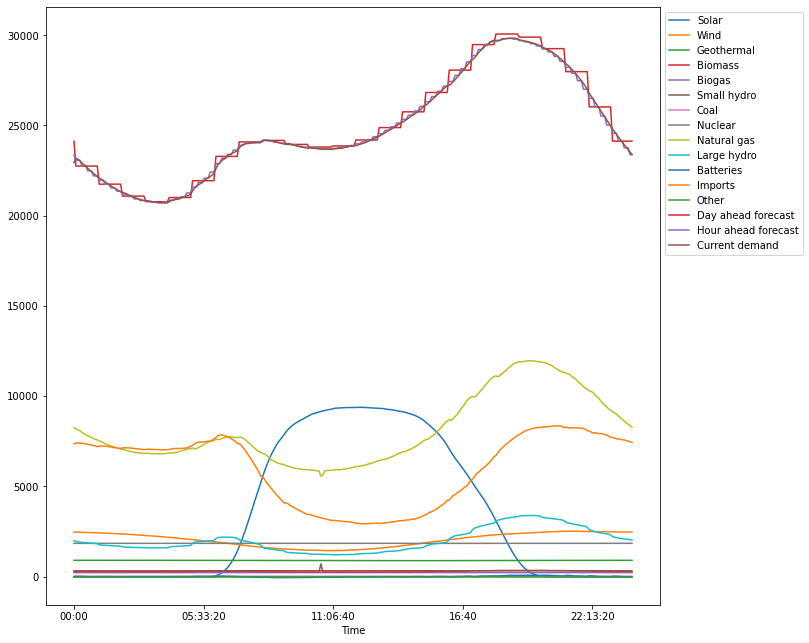

In [ ]:
df3 = pd.merge(df_sources,df_dmd,on="Time")

df3.plot(figsize=(11, 11))
plt.legend(fancybox=True,bbox_to_anchor=(1, 1))


<AxesSubplot:xlabel='Time'>

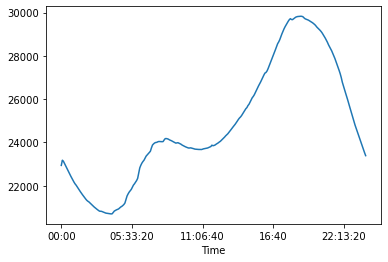

In [ ]:
df3['Current demand'].plot()

<AxesSubplot:xlabel='Time'>

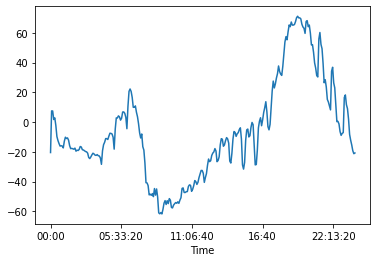

In [ ]:
df3.Batteries.plot()

<AxesSubplot:xlabel='Time'>

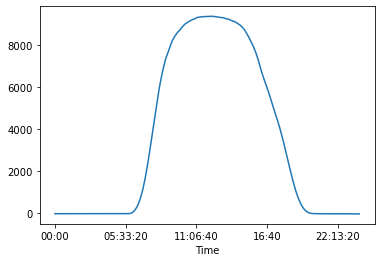

In [ ]:
df3.Solar.plot()

<AxesSubplot:xlabel='Time'>

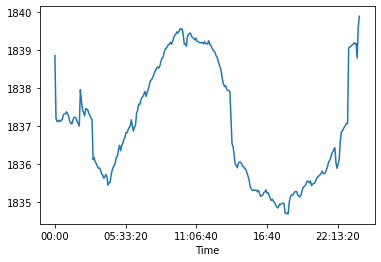

In [ ]:
df3.Nuclear.plot()

## merging 

In [ ]:
sum1 = df3[['Solar','Wind','Geothermal','Biomass','Small hydro','Coal','Nuclear','Large hydro','Batteries','Imports','Natural gas']].sum(axis=1)

energy_by_hour = pd.DataFrame()
for i in range(len(sum1)):
    try:
        energy_by_hour_new = pd.DataFrame([[df3.index[i],sum1[i]]],columns = ['Time','Energy produced'])
        energy_by_hour = energy_by_hour.append(energy_by_hour_new,ignore_index = True)
    except:
        energy_by_hour = pd.DataFrame([[df3.index[i],sum1[i]]],columns = ['Time','Energy produced'])
    

In [ ]:
df3['Current demand']

Time
00:00:00    22938.787964
00:05:00    23178.629562
00:10:00    23129.702555
00:15:00    23029.918796
00:20:00    22930.970803
                ...     
23:35:00    23929.257534
23:40:00    23786.175342
23:45:00    23655.266910
23:50:00    23521.678866
23:55:00    23389.589204
Name: Current demand, Length: 288, dtype: float64

In [ ]:
Demand_And_Production_by_hour = pd.merge(energy_by_hour,df3['Current demand'],on='Time') 

<AxesSubplot:xlabel='Time'>

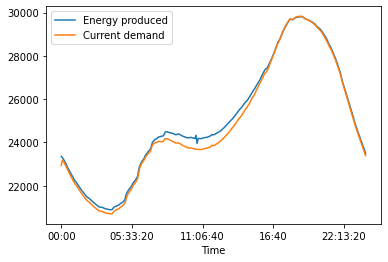

In [ ]:
Demand_And_Production_by_hour.plot(x='Time',y=['Energy produced', 'Current demand'])

##                                                             Demand and Sources by day

## Demand

In [ ]:
df_dmd_2 = pd.DataFrame()
df_dmd_by_day = pd.DataFrame()

for file in os.listdir("demand"): 
    try:
        current_demand_2 = pd.read_csv("demand/"+file)
        df_dmd_2 = df_dmd_2.append(current_demand_2, ignore_index=False)
        new_row = [pd.to_datetime(file[0:8], format='%Y%m%d'),df_dmd_2['Day ahead forecast'].mean(),df_dmd_2['Hour ahead forecast'].mean(),df_dmd_2['Current demand'].mean()]
        cols = ['Day','Day ahead forecast','Hour ahead forecast','Current demand']
        df_dmd_by_day_new = pd.DataFrame([new_row],columns = cols)
        df_dmd_by_day = df_dmd_by_day.append(df_dmd_by_day_new,ignore_index = True)
        
    except:
        if df_dmd_by_day.empty:
            new_row = [pd.to_datetime(file[0:8], format='%Y%m%d'),df_dmd_2['Day ahead forecast'].mean(),df_dmd_2['Hour ahead forecast'].mean(),df_dmd_2['Current demand'].mean()]
            cols = ['Day','Day ahead forecast','Hour ahead forecast','Current demand']
            df_dmd_by_day = pd.DataFrame([new_row],columns = cols)
    
        else:
            continue

<AxesSubplot:xlabel='Day'>

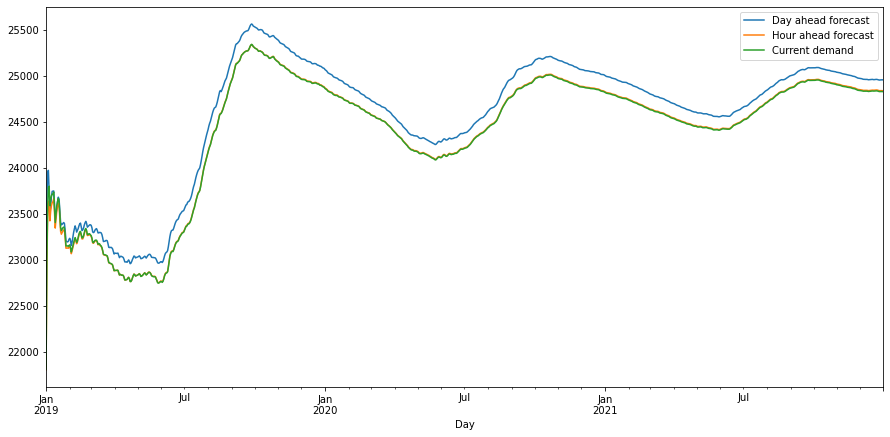

In [ ]:
df_dmd_by_day.plot(x='Day',y=['Day ahead forecast','Hour ahead forecast','Current demand'],figsize=(15, 7))

## Sources

In [ ]:
df_sources_2 = pd.DataFrame()
df_sources_by_day = pd.DataFrame()

for file in os.listdir("sources"): 
    try:
        current_sources_2 = pd.read_csv("sources/"+file)
        df_sources_2 = df_sources_2.append(current_sources_2, ignore_index=False)
        
        means=[]
        columns = current_sources_2.columns[1:-1].insert(0,'Day')
        for i in range(len(columns)):
            if i == 0:
                continue
            else:
                means.append(current_sources_2[columns[i]].mean())
            new_row = [pd.to_datetime(file[0:8], format='%Y%m%d')]
            new_row = new_row+means
            cols = columns
        
        
        df_sources_by_day_new = pd.DataFrame([new_row],columns = cols)
        df_sources_by_day = df_sources_by_day.append(df_sources_by_day_new,ignore_index = True)
        
    except:
        if df_dmd_by_day.empty:
            means=[]
            columns = current_sources_2.columns[1:-1].insert(0,'Day')
            for i in range(len(columns)):
                if i == 0:
                    continue
                else:
                    means.append(current_sources_2[columns[i]].mean())
            new_row = [pd.to_datetime(file[0:8], format='%Y%m%d')]
            new_row = new_row+means
            cols = columns
            df_sources_by_day = pd.DataFrame([new_row],columns = cols)
            break
        else:
            continue

In [ ]:
df_sources_by_day

,Day,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Natural Gas,Large Hydro
0,2019-01-01,2507.791667,1426.833333,988.208333,380.069444,211.517361,221.000000,13.027778,2273.531250,6589.802083,1859.850694,1.333333,5475.114583,NaN,NaN
1,2019-01-02,2540.552083,350.125000,986.458333,374.850694,226.656250,226.361111,13.177083,2271.850694,NaN,1881.885417,-4.767361,6988.871528,NaN,NaN
2,2019-01-03,2573.569444,423.149306,986.430556,340.072917,229.368056,200.340278,13.746528,2269.736111,8026.524306,1756.774306,0.951389,8099.680556,NaN,NaN
3,2019-01-04,2545.795139,298.836806,987.017361,274.326389,229.118056,196.128472,13.954861,2271.326389,8032.128472,1772.364583,-4.381944,7947.940972,NaN,NaN
4,2019-01-05,511.885417,926.003472,985.503472,281.930556,227.715278,189.260417,12.399306,2271.347222,8649.958333,1558.909722,-6.465278,8490.590278,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,1509.361111,3612.711806,889.812500,257.083333,215.996528,183.114583,16.538194,2263.729167,NaN,NaN,20.232639,6306.500000,9437.798611,1557.607639
1092,2021-12-28,1933.798611,3796.916667,895.104167,247.322917,215.600694,161.444444,19.732639,2266.763889,NaN,NaN,-66.704861,5751.809028,9931.319444,1541.017361
1093,2021-12-29,1747.815972,2269.079861,891.993056,264.451389,215.774306,173.927083,19.128472,2266.878472,NaN,NaN,41.736111,7053.958333,10367.888889,1615.829861
1094,2021-12-30,1342.385417,1835.197917,881.750000,276.295139,212.472222,181.868056,17.156250,2266.531250,NaN,NaN,-34.687500,7732.118056,9900.711806,1498.836806


In [ ]:
### UNIFY DATASETS ###

df4 = pd.merge(df_sources_by_day,df_dmd_by_day,on="Day")
##Data cleaning

df4 = df4.fillna(0)
df4['Natural Gas'] = df4['Natural Gas'] + df4['Natural gas']
del df4['Natural gas']

df4['Large hydro'] = df4['Large Hydro'] + df4['Large hydro']
del df4['Large Hydro']


<AxesSubplot:xlabel='Day'>

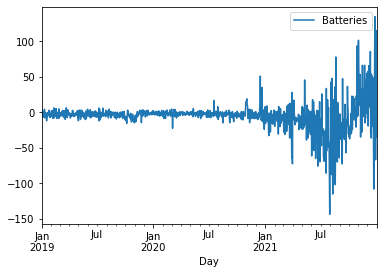

In [ ]:
df4.plot(x='Day',y='Batteries')

<AxesSubplot:xlabel='Day'>

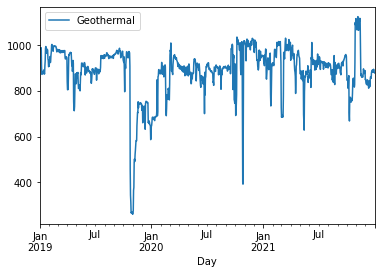

In [ ]:
df_sources_by_day.plot(x='Day',y='Geothermal')

<AxesSubplot:xlabel='Day'>

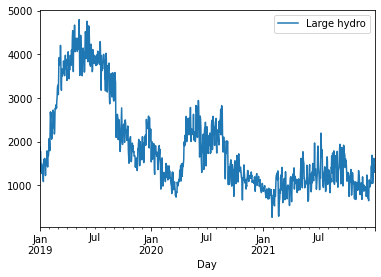

In [ ]:
df4.plot(x='Day',y='Large hydro')

In [ ]:
sum2 = df4[['Solar','Wind','Geothermal','Biomass','Small hydro','Coal','Nuclear','Large hydro','Batteries','Imports','Natural Gas']].sum(axis=1)


In [ ]:
energy_by_day = pd.DataFrame()
for i in range(len(sum2)):
    try:
        energy_by_day_new = pd.DataFrame([[df4['Day'][i],sum2[i]]],columns = ['Day','Energy produced'])
        energy_by_day = energy_by_day.append(energy_by_day_new,ignore_index = True)
    except:
        energy_by_day = pd.DataFrame([[df4['Day'][i],sum2[i]]],columns = ['Day','Energy produced'])
    
    

In [ ]:
Demand_And_Production = pd.concat([energy_by_day,df4['Current demand']],axis=1)


<AxesSubplot:xlabel='Day'>

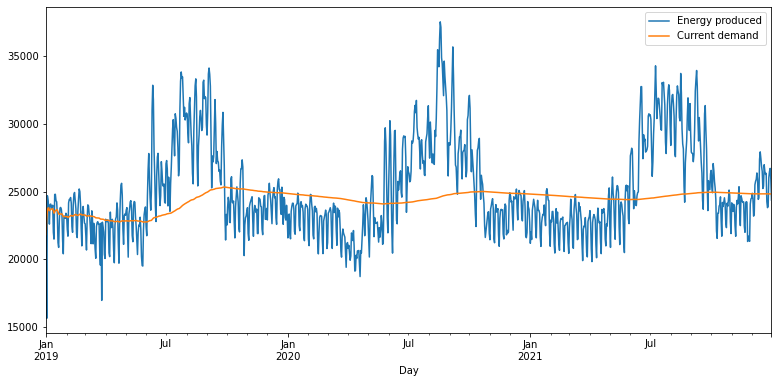

In [ ]:
Demand_And_Production.plot(x='Day',y=['Energy produced','Current demand'],figsize=(13,6))

# Clustering for outliers


In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams

## outliers by day

Text(0, 0.5, 'Energy demand')

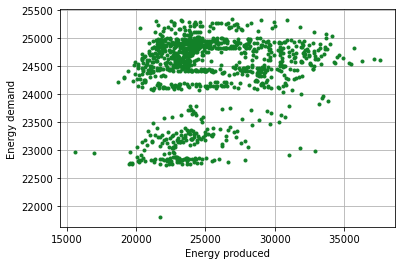

In [ ]:
plt.plot(Demand_And_Production['Energy produced'],Demand_And_Production['Current demand'],marker='.',linewidth=0, color='#128128')
plt.grid(which='major')
plt.xlabel('Energy produced')
plt.ylabel('Energy demand')

In [ ]:
dbscan_data = Demand_And_Production[['Energy produced','Current demand']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)

In [ ]:
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-0.988725  , -3.8138633 ],
       [-2.7673857 , -2.1040406 ],
       [-0.1282813 , -1.2311156 ],
       ...,
       [ 0.46052194,  0.62564427],
       [ 0.22330007,  0.6250518 ],
       [-0.22163112,  0.6223251 ]], dtype=float32)

In [ ]:
model = DBSCAN(eps=0.25, min_samples = 12, metric='euclidean').\
    fit(dbscan_data)


In [ ]:
model

DBSCAN(eps=0.25, min_samples=12)

In [ ]:
outliers_df = Demand_And_Production[model.labels_ == -1]
clusters_df = Demand_And_Production[model.labels_ != -1]

In [ ]:
model.labels_

array([-1, -1,  0, ...,  3,  3,  3], dtype=int64)

In [ ]:
colors = model.labels_ 
colors_clusters = colors[colors != -1]
color_outliers = 'red'

clusters = Counter(model.labels_)
print(clusters)
print(Demand_And_Production[model.labels_ ==-1].head())
print('Number of clusters ={}'.format(len(clusters)-1))

Counter({3: 844, 1: 137, -1: 74, 4: 15, 2: 14, 0: 12})
          Day  Energy produced  Current demand
0  2019-01-01     21736.562500    21812.465278
1  2019-01-02     15629.364583    22973.539931
5  2019-01-06     22596.989583    23587.663773
11 2019-01-12     21988.211806    23580.558449
13 2019-01-14     24786.409722    23501.513641
Number of clusters =5


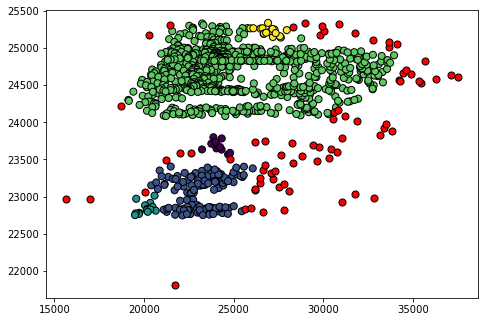

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(clusters_df['Energy produced'], clusters_df['Current demand'], c = colors_clusters, edgecolors='black',s=50)
ax.scatter(outliers_df['Energy produced'], outliers_df['Current demand'], c = color_outliers, edgecolors='black',s=50)

In [ ]:
print(outliers_df)

           Day  Energy produced  Current demand
0   2019-01-01     21736.562500    21812.465278
1   2019-01-02     15629.364583    22973.539931
5   2019-01-06     22596.989583    23587.663773
11  2019-01-12     21988.211806    23580.558449
13  2019-01-14     24786.409722    23501.513641
..         ...              ...             ...
597 2020-08-20     34884.260417    24647.914562
598 2020-08-21     34454.541667    24663.652507
601 2020-08-24     34643.760417    24705.144367
614 2020-09-06     35692.250000    24824.080230
920 2021-07-09     34293.954861    24555.669181

[74 rows x 3 columns]


In [ ]:
print('The average energy production in outliers: {}'.format(outliers_df['Energy produced'].mean()))
print('The average energy production: {}'.format(Demand_And_Production['Energy produced'].mean()))

The average energy production in outliers: 29069.427328406367
The average energy production: 25131.442391285236


In [ ]:
print("Max value: {}".format(outliers_df['Energy produced'].max()))
print("Min value: {}".format(outliers_df['Energy produced'].min()))
print("Mean value: {}".format(outliers_df['Energy produced'].mean()))
print("Standart deviation: {}".format(outliers_df['Energy produced'].std()))

Max value: 37543.899305555555
Min value: 15629.364583333332
Mean value: 29069.427328406367
Standart deviation: 4784.386276640038


<AxesSubplot:xlabel='Day'>

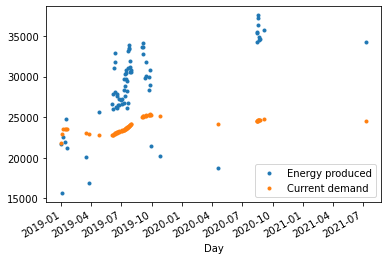

In [ ]:
outliers_df.plot(x='Day',marker='.',linewidth=0)

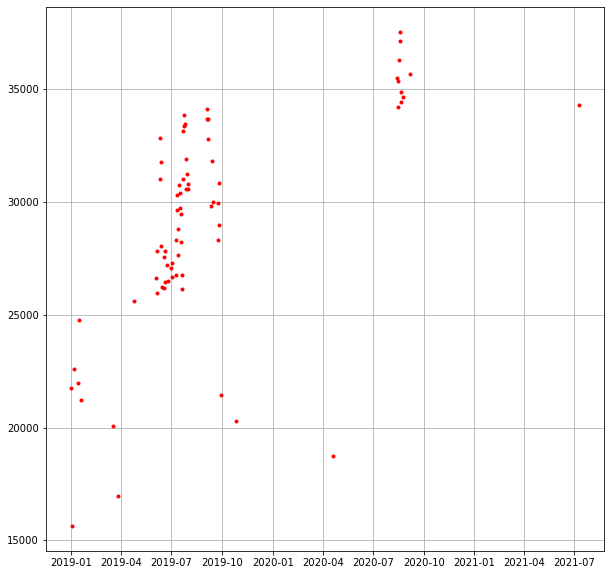

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(which='major')
plt.plot(outliers_df['Day'],outliers_df['Energy produced'],marker='.',linewidth=0, color='red')